In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("utkarshx27/which-resume-attributes-drive-job-callbacks")

print("Path to dataset files:", path)

Path to dataset files: /Users/fruit/.cache/kagglehub/datasets/utkarshx27/which-resume-attributes-drive-job-callbacks/versions/1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("resume.csv")

In [4]:
#shape of df
print(df.shape[0], 'rows')
print(df.shape[1], 'columns')
print()

#head
print(df.head())

4870 rows
30 columns

   job_ad_id job_city   job_industry    job_type  job_fed_contractor  \
0        384  Chicago  manufacturing  supervisor                 NaN   
1        384  Chicago  manufacturing  supervisor                 NaN   
2        384  Chicago  manufacturing  supervisor                 NaN   
3        384  Chicago  manufacturing  supervisor                 NaN   
4        385  Chicago  other_service   secretary                 0.0   

   job_equal_opp_employer job_ownership  job_req_any  job_req_communication  \
0                       1       unknown            1                      0   
1                       1       unknown            1                      0   
2                       1       unknown            1                      0   
3                       1       unknown            1                      0   
4                       1     nonprofit            1                      0   

   job_req_education  ... honors  worked_during_school  years_experien

In [5]:
#column type
print(df.dtypes)
print()

job_ad_id                   int64
job_city                   object
job_industry               object
job_type                   object
job_fed_contractor        float64
job_equal_opp_employer      int64
job_ownership              object
job_req_any                 int64
job_req_communication       int64
job_req_education           int64
job_req_min_experience     object
job_req_computer            int64
job_req_organization        int64
job_req_school             object
received_callback           int64
firstname                  object
race                       object
gender                     object
years_college               int64
college_degree              int64
honors                      int64
worked_during_school        int64
years_experience            int64
computer_skills             int64
special_skills              int64
volunteer                   int64
military                    int64
employment_holes            int64
has_email_address           int64
resume_quality

In [6]:
#missing values
placeholders = ['unknown', 'UNK', 'Unknown']
missing_values = df.isnull() | df.isin(placeholders)
missing_count = missing_values.sum()
print(missing_count)

job_ad_id                    0
job_city                     0
job_industry                 0
job_type                     0
job_fed_contractor        1768
job_equal_opp_employer       0
job_ownership             1992
job_req_any                  0
job_req_communication        0
job_req_education            0
job_req_min_experience    2746
job_req_computer             0
job_req_organization         0
job_req_school               0
received_callback            0
firstname                    0
race                         0
gender                       0
years_college                0
college_degree               0
honors                       0
worked_during_school         0
years_experience             0
computer_skills              0
special_skills               0
volunteer                    0
military                     0
employment_holes             0
has_email_address            0
resume_quality               0
dtype: int64


In [7]:
#check target variable
print(df['received_callback'].describe)
print('Target variable Music Effects is categorical')
print()

<bound method NDFrame.describe of 0       0
1       0
2       0
3       0
4       0
       ..
4865    0
4866    0
4867    0
4868    0
4869    0
Name: received_callback, Length: 4870, dtype: int64>
Target variable Music Effects is categorical



In [8]:
df.describe()

,job_ad_id,job_fed_contractor,job_equal_opp_employer,job_req_any,job_req_communication,job_req_education,job_req_computer,job_req_organization,received_callback,years_college,college_degree,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address
count,4870.000000,3102.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,651.777823,0.114765,0.291170,0.787269,0.124846,0.106776,0.437166,0.072690,0.080493,3.618480,0.719507,0.052772,0.559548,7.842916,0.820534,0.328747,0.411499,0.097125,0.448049,0.479261
std,388.690698,0.318789,0.454349,0.409281,0.330578,0.308860,0.496087,0.259654,0.272083,0.714997,0.449286,0.223601,0.496492,5.044612,0.383782,0.469806,0.492156,0.296159,0.497345,0.499621
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,306.250000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,647.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,979.750000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,9.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1344.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,44.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.columns

Index(['job_ad_id', 'job_city', 'job_industry', 'job_type',
       'job_fed_contractor', 'job_equal_opp_employer', 'job_ownership',
       'job_req_any', 'job_req_communication', 'job_req_education',
       'job_req_min_experience', 'job_req_computer', 'job_req_organization',
       'job_req_school', 'received_callback', 'firstname', 'race', 'gender',
       'years_college', 'college_degree', 'honors', 'worked_during_school',
       'years_experience', 'computer_skills', 'special_skills', 'volunteer',
       'military', 'employment_holes', 'has_email_address', 'resume_quality'],
      dtype='object')

In [10]:
#sns.pairplot(df, hue = "received_callback")
#plt.show()

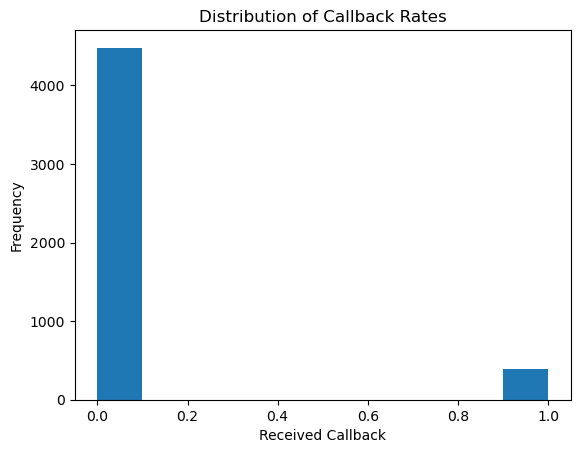

In [11]:
# Plot a histogram of callback rates

plt.hist(df["received_callback"])
plt.xlabel("Received Callback")
plt.ylabel("Frequency")
plt.title("Distribution of Callback Rates")
plt.show()

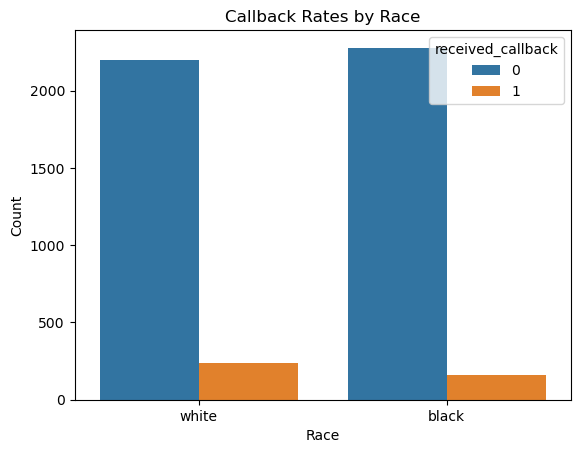

In [12]:
sns.countplot(x="race", hue="received_callback", data=df)
plt.xlabel("Race")
plt.ylabel("Count")
plt.title("Callback Rates by Race")
plt.show()

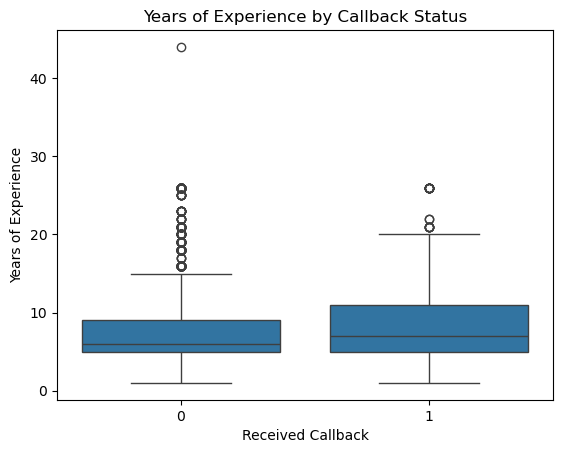

In [13]:
sns.boxplot(x="received_callback", y="years_experience", data=df)
plt.xlabel("Received Callback")
plt.ylabel("Years of Experience")
plt.title("Years of Experience by Callback Status")
plt.show()

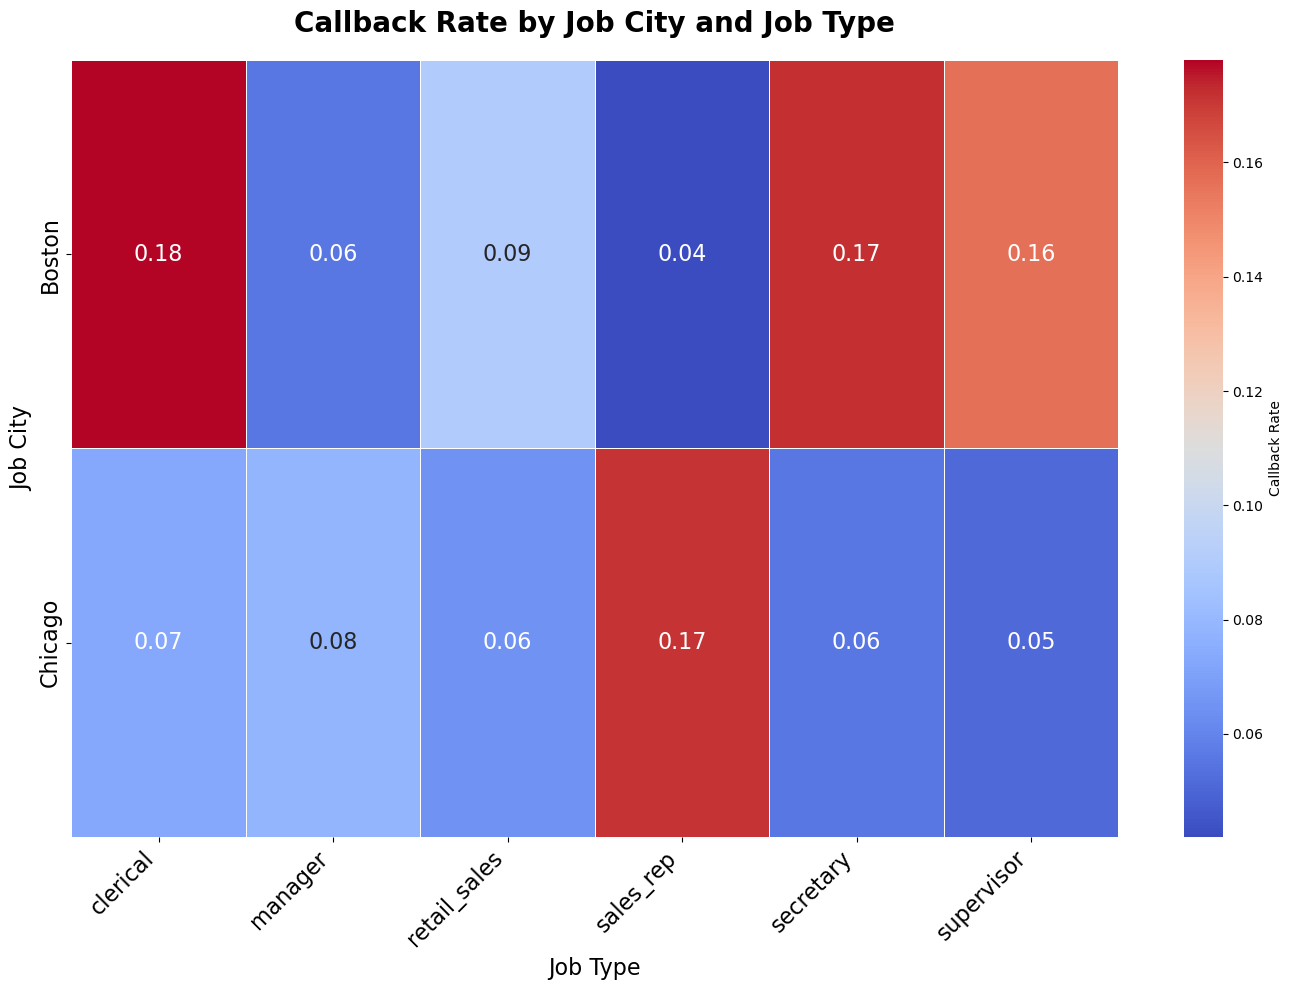

In [14]:
heatmap_data = df.pivot_table(index='job_city', columns='job_type', values='received_callback', aggfunc='mean')

# Plotting the heatmap with an improved design
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Callback Rate'}, annot_kws={"size": 16})
plt.title('Callback Rate by Job City and Job Type', fontsize=20, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Job Type", fontsize=16)
plt.ylabel("Job City", fontsize=16)
plt.tight_layout()
plt.show()

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/3909797406.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='years_college', y='received_callback', data=df, ci=None, palette='viridis')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/3909797406.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='years_college', y='received_callback', data=df, ci=None, palette='viridis')


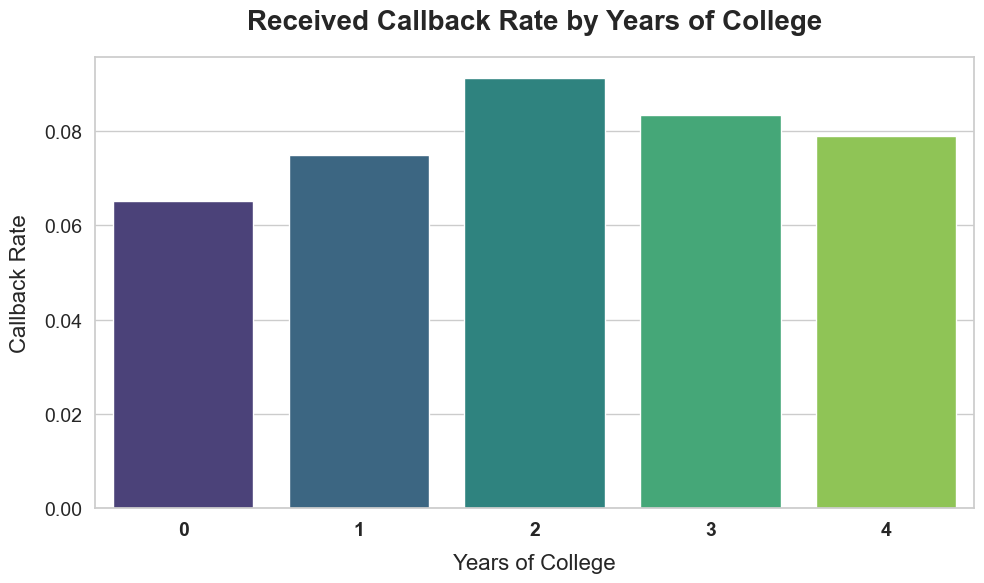

In [15]:
# Barplot for Received Callback Rate by Years of College
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create the barplot
sns.barplot(x='years_college', y='received_callback', data=df, ci=None, palette='viridis')

# Customizing the plot
plt.title('Received Callback Rate by Years of College', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Years of College', fontsize=16, labelpad=10)
plt.ylabel('Callback Rate', fontsize=16, labelpad=10)
plt.xticks(fontsize=14, weight='bold')
plt.yticks(fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


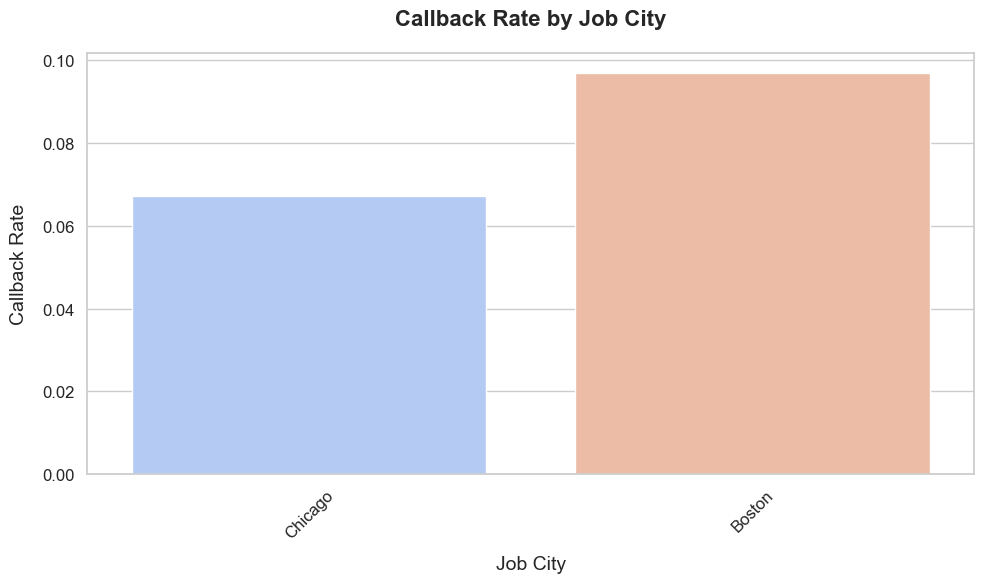

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


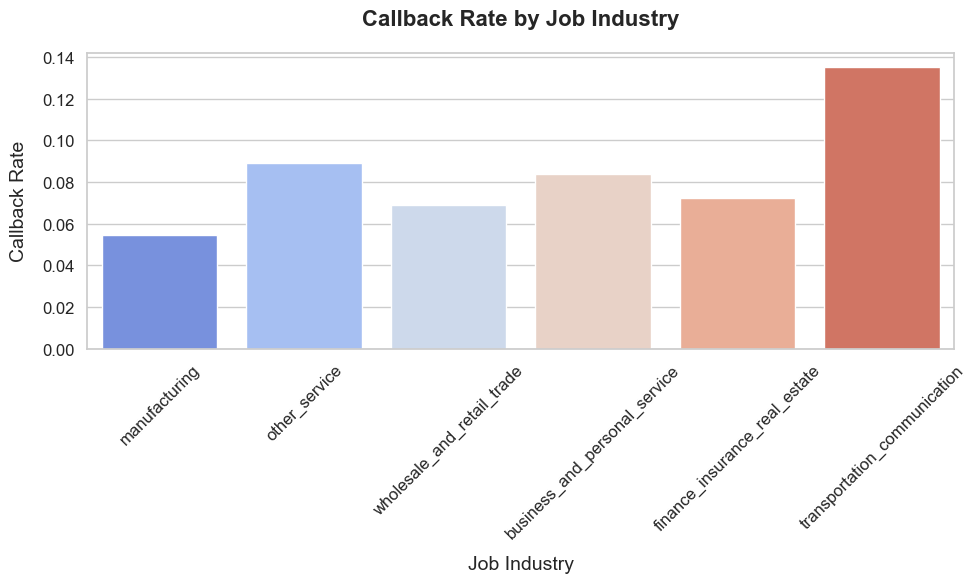

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


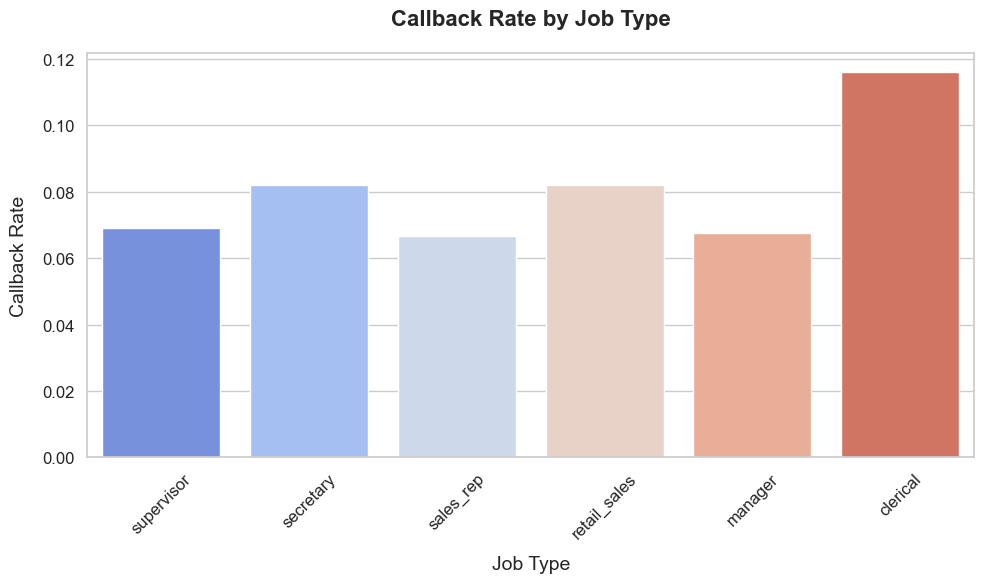

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


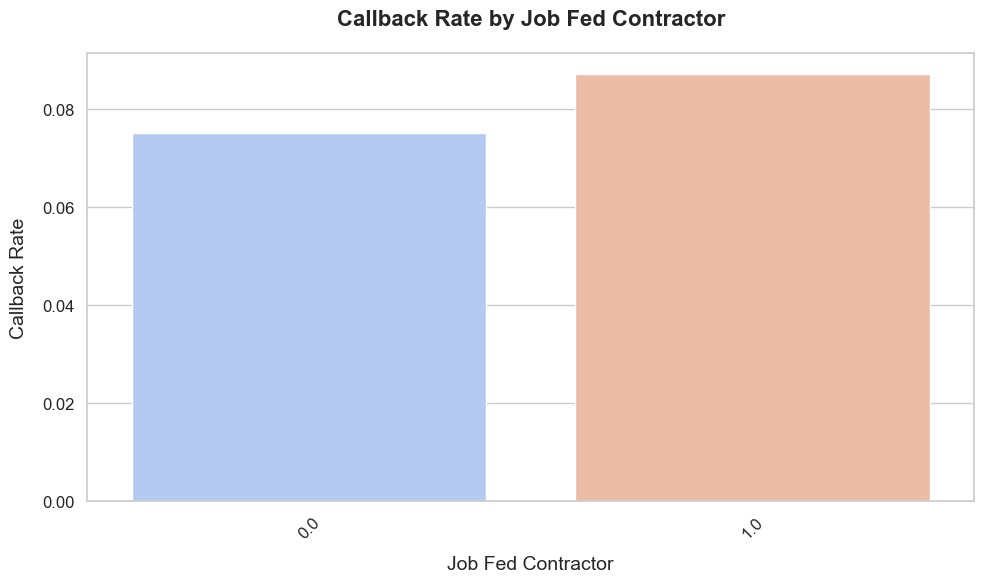

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


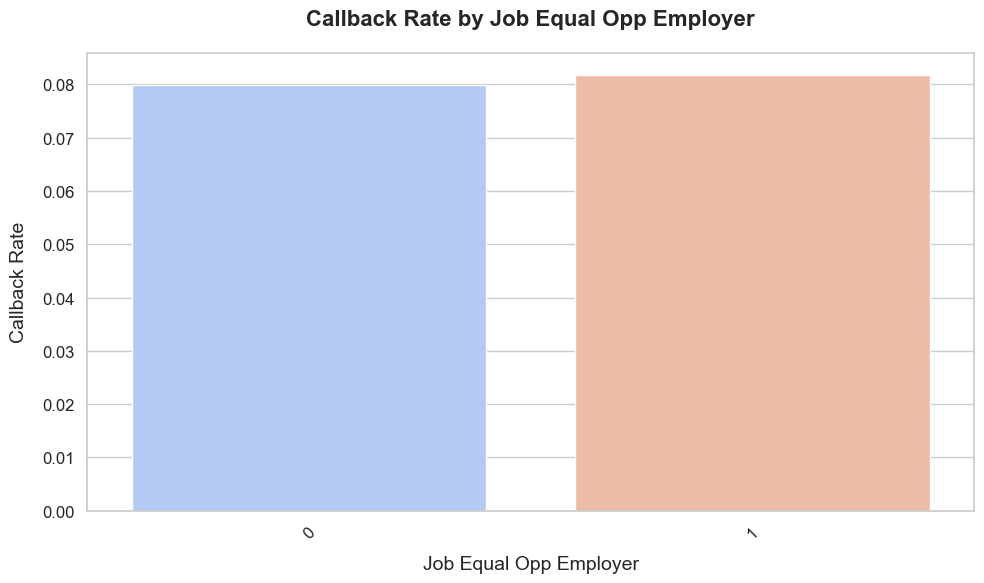

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


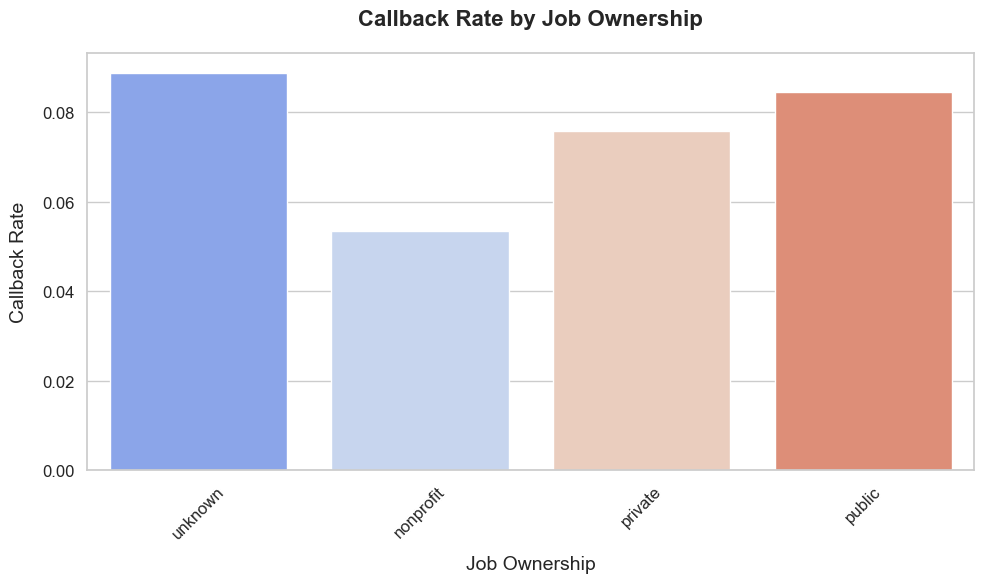

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


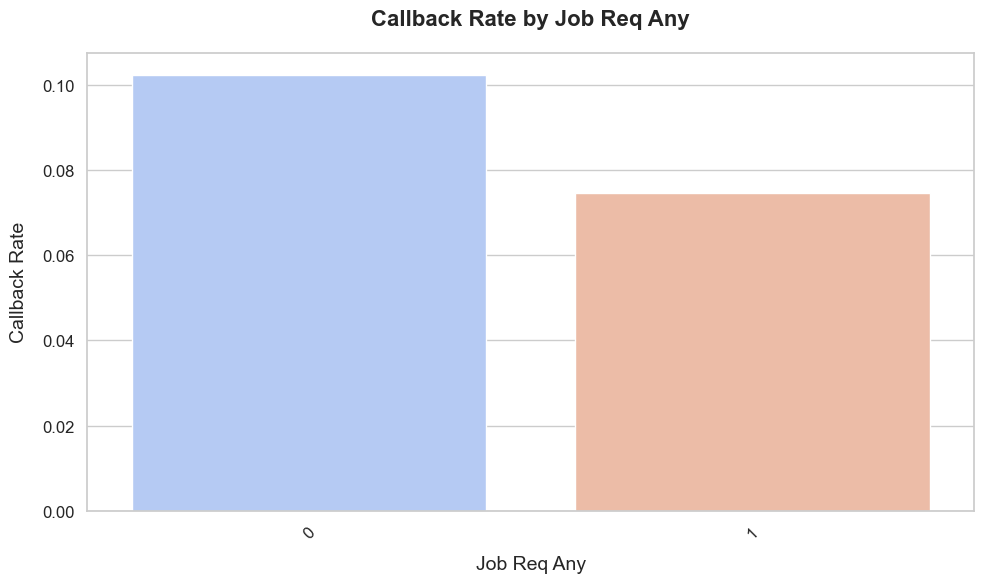

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


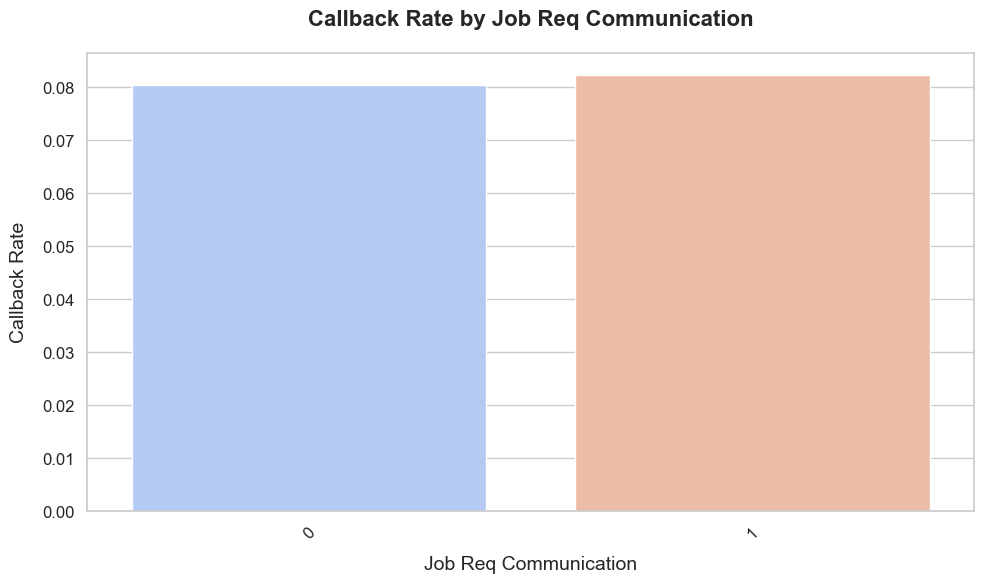

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


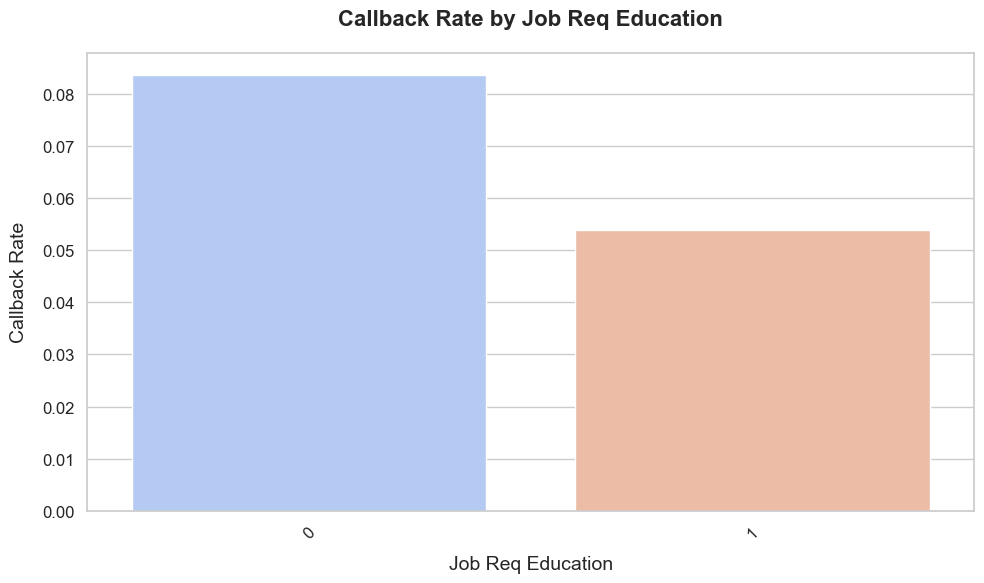

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


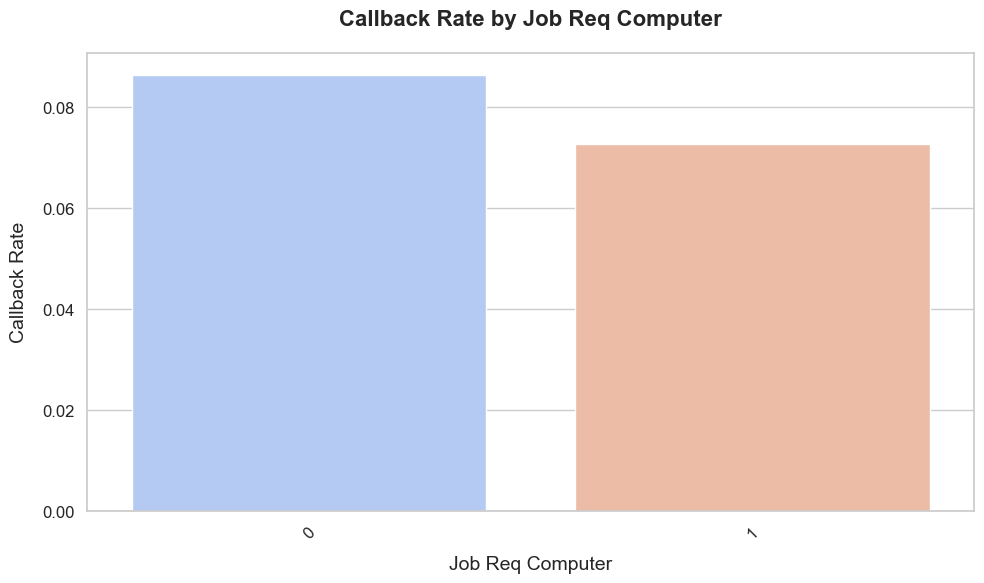

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


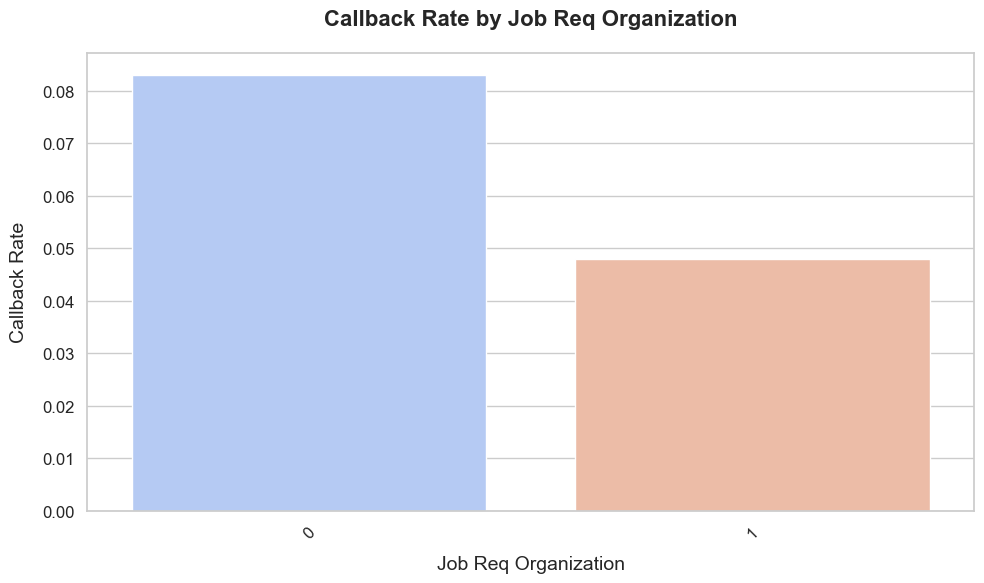

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


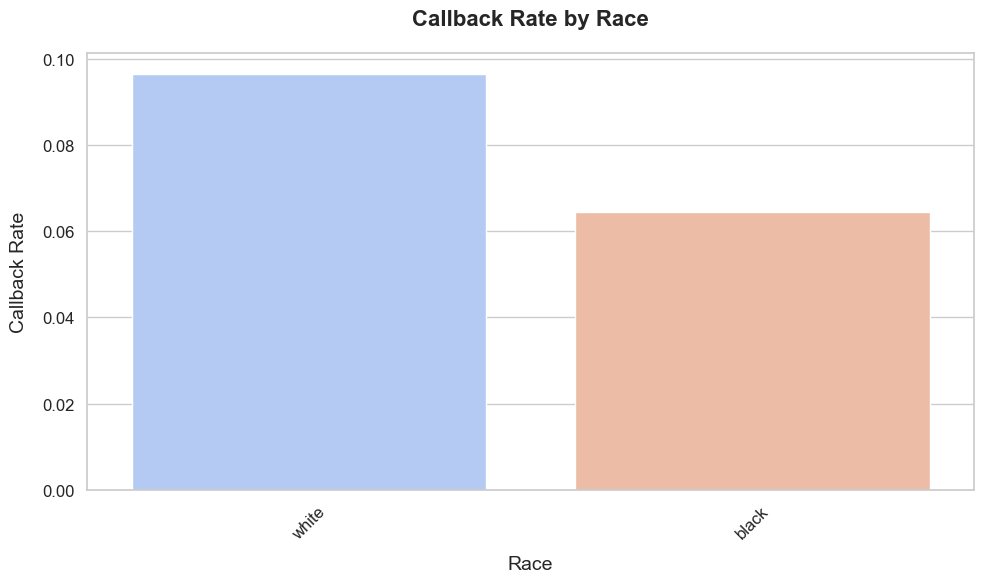

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


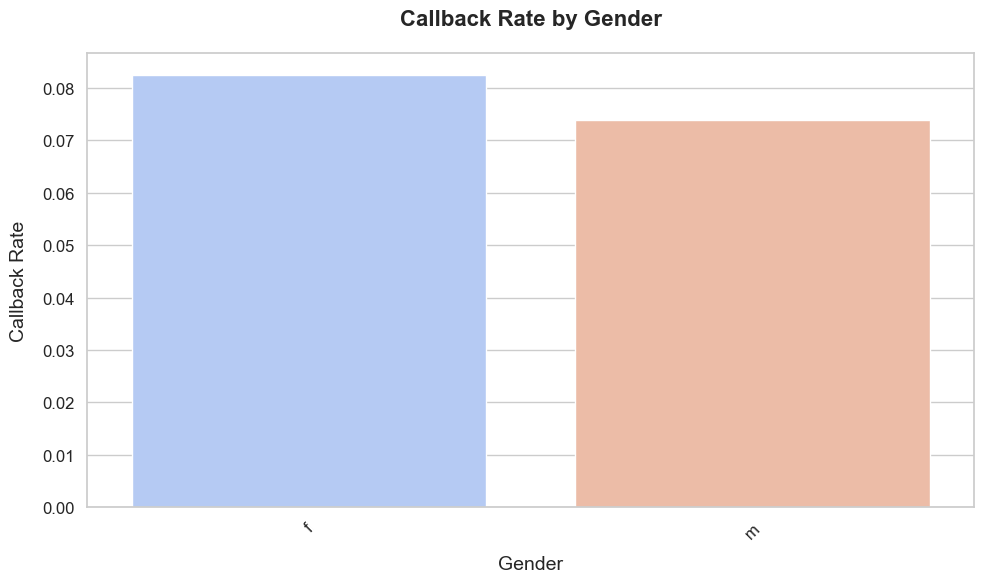

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


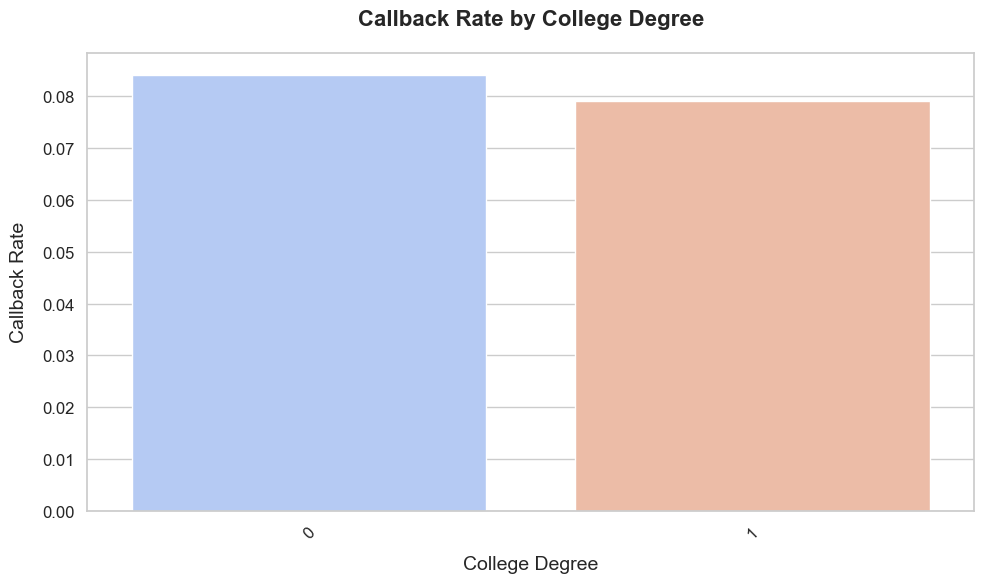

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


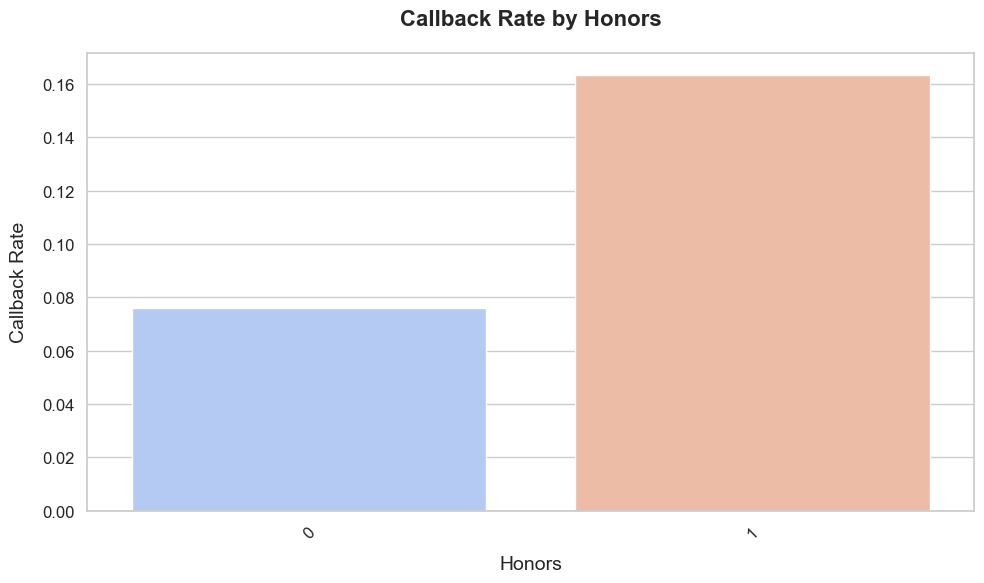

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


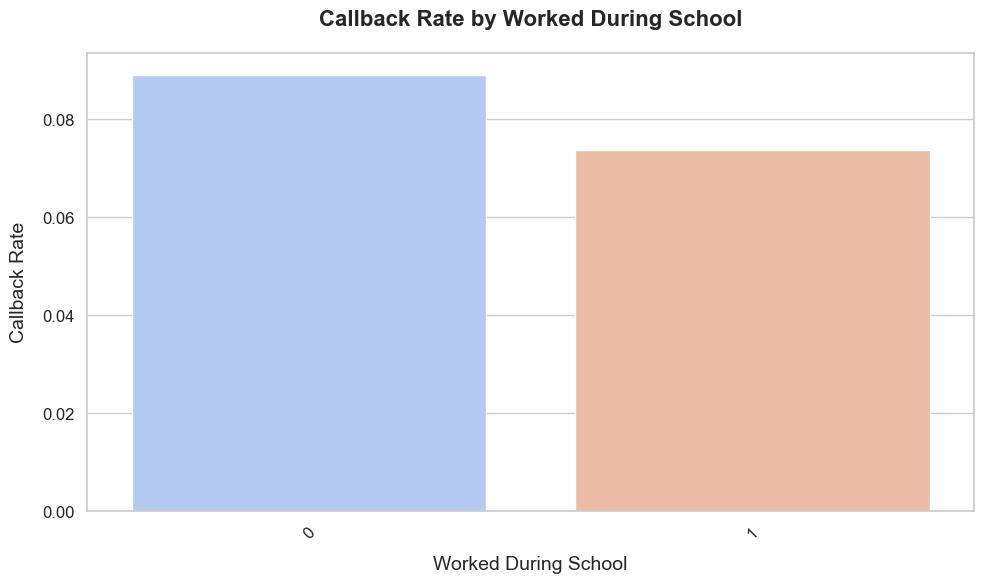

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


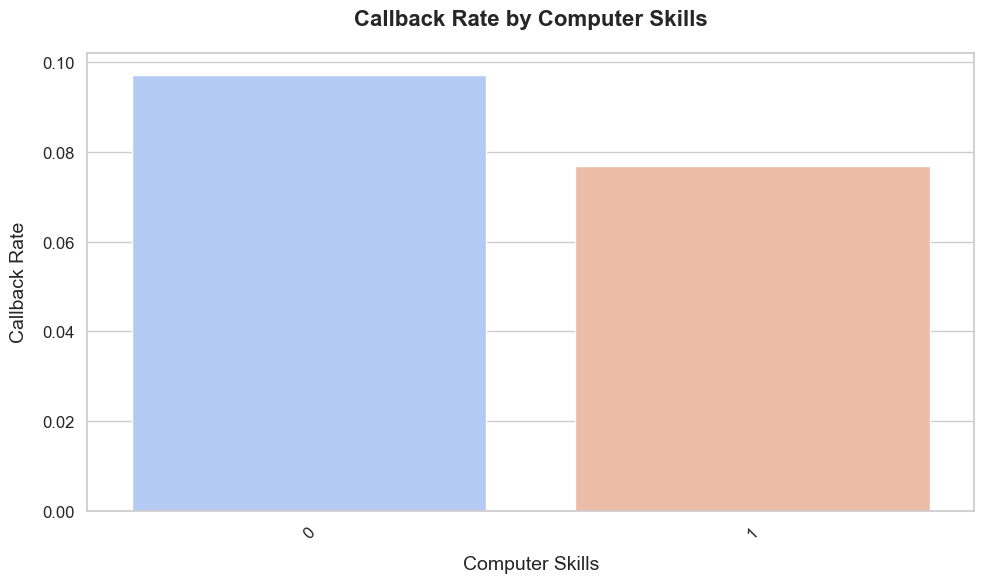

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


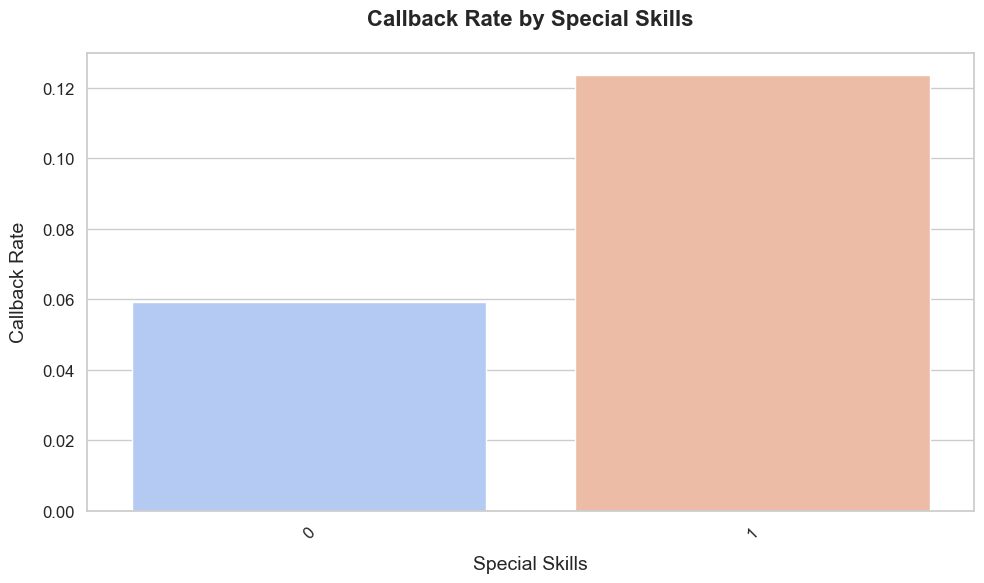

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


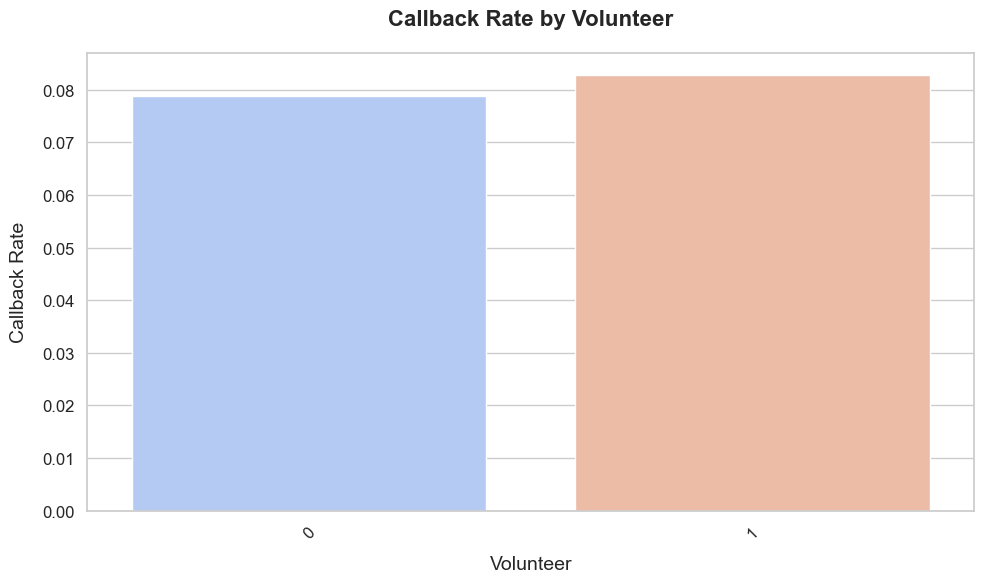

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


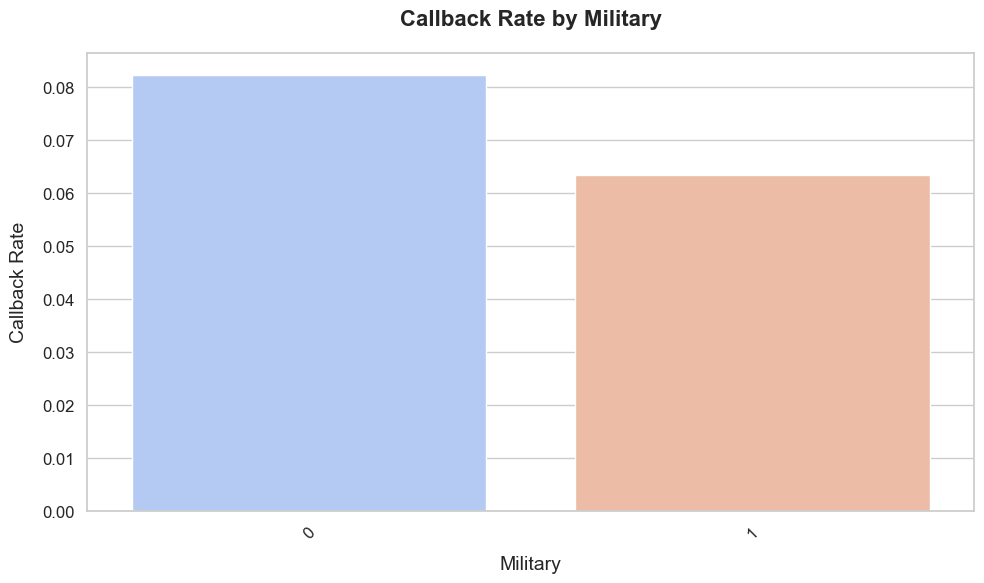

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


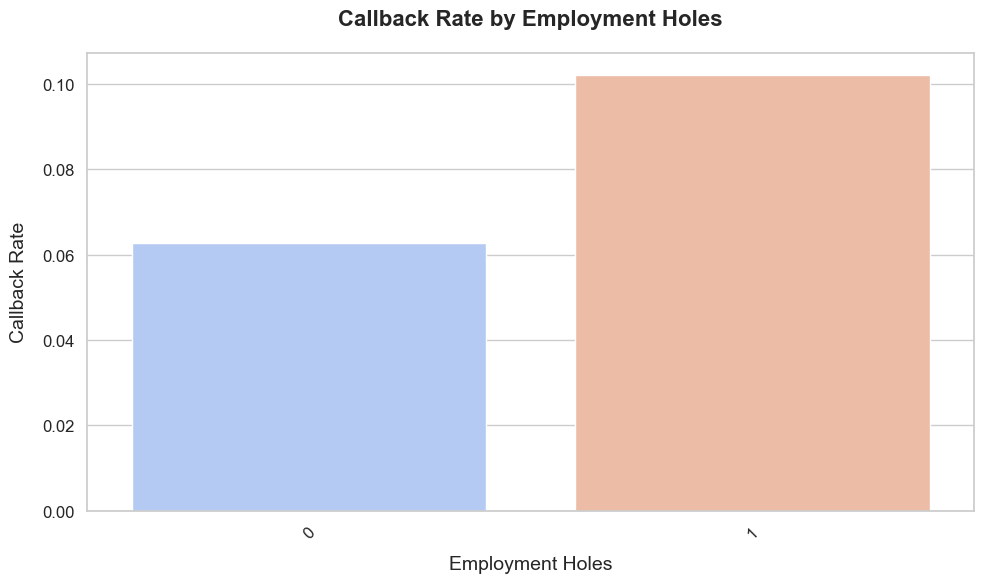

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


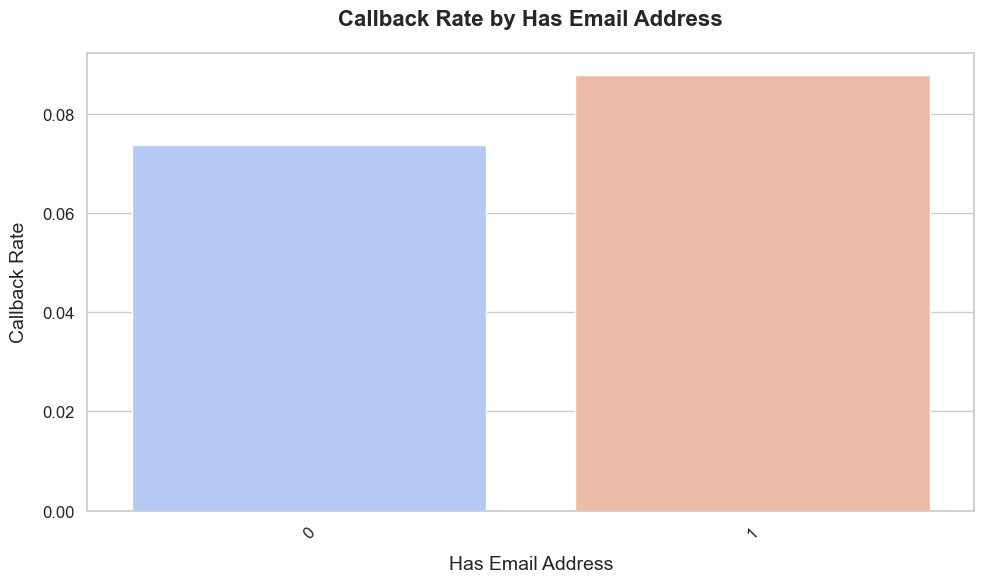

In [16]:
# List of categorical features (excluding the target 'received_callback')
categorical_features = ['job_city', 'job_industry', 'job_type', 'job_fed_contractor', 'job_equal_opp_employer', 
                        'job_ownership', 'job_req_any', 'job_req_communication', 'job_req_education', 'job_req_computer', 
                        'job_req_organization', 'race', 'gender', 'college_degree', 'honors', 'worked_during_school', 
                        'computer_skills', 'special_skills', 'volunteer', 'military', 'employment_holes', 'has_email_address']

# Loop through each categorical feature and create a bar plot for callback rate
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")

    # Create a bar plot for each categorical feature vs callback rate
    sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')

    # Customize the plot
    plt.title(f'Callback Rate by {feature.replace("_", " ").title()}', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel(f'{feature.replace("_", " ").title()}', fontsize=14, labelpad=10)
    plt.ylabel('Callback Rate', fontsize=14, labelpad=10)
    plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
    plt.yticks(fontsize=12)

    # Display the plot
    plt.tight_layout()
    plt.show()

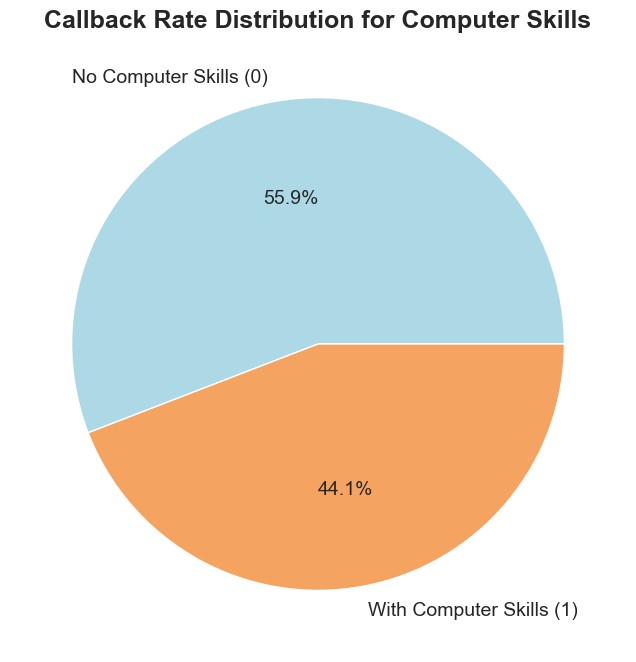

In [17]:

# Pie chart for callback rates by computer skills with legend
def pie_chart_plot(feature, df):
    callback_counts = df.groupby(feature)['received_callback'].mean()
    labels = ['No Computer Skills (0)', 'With Computer Skills (1)']
    
    # Create pie chart
    callback_counts.plot(kind='pie', labels=labels, autopct='%1.1f%%', colors=['#ADD8E6', '#F4A460'], figsize=(8, 8), textprops={'fontsize': 14})
    
    # Title and subtitle
    plt.title(f'Callback Rate Distribution for {feature.replace("_", " ").title()}', fontsize=18, fontweight='bold')
    plt.ylabel('')  # Remove default y-label

    plt.show()

# Call the function
pie_chart_plot('computer_skills', df)



In [18]:
from sklearn.model_selection import train_test_split

# Get unique values for all columns
unique_values_all_columns = {col: df[col].unique() for col in df.columns}
for col, unique_values in unique_values_all_columns.items():
    print(f"Unique values in column {col}: {unique_values}")


Unique values in column job_ad_id: [ 384  385  386 ...  381 1344  382]
Unique values in column job_city: ['Chicago' 'Boston']
Unique values in column job_industry: ['manufacturing' 'other_service' 'wholesale_and_retail_trade'
 'business_and_personal_service' 'finance_insurance_real_estate'
 'transportation_communication']
Unique values in column job_type: ['supervisor' 'secretary' 'sales_rep' 'retail_sales' 'manager' 'clerical']
Unique values in column job_fed_contractor: [nan  0.  1.]
Unique values in column job_equal_opp_employer: [1 0]
Unique values in column job_ownership: ['unknown' 'nonprofit' 'private' 'public']
Unique values in column job_req_any: [1 0]
Unique values in column job_req_communication: [0 1]
Unique values in column job_req_education: [0 1]
Unique values in column job_req_min_experience: ['5' 'some' nan '3' '2' '1' '8' '7' '0.5' '10' '0' '4' '6']
Unique values in column job_req_computer: [1 0]
Unique values in column job_req_organization: [0 1]
Unique values in col

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


y = df['received_callback']
X = df.drop(['received_callback', 'firstname','job_ad_id'], axis=1)

random_state = 42

X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,random_state=random_state)

X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=random_state)

# collect which encoder to use on each feature
# needs to be done manually
ordinal_ftrs = ['job_req_min_experience','job_req_school','years_college','years_experience','resume_quality'] 
ordinal_job_req_min = ['unknown','0','0.5','1','2','3','4','5','some','6','7','8','10']
ordinal_job_req_school = ['none_listed','high_school_grad','some_college','college']
ordinal_years_college = [0,1,2,3,4]
ordinal_years_experience = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 44]
ordinal_resume_quality = ['low','high']

onehot_ftrs = ['job_city','job_industry','job_type','job_fed_contractor','job_equal_opp_employer','job_ownership','job_req_any',\
               'job_req_communication','job_req_education','job_req_computer','job_req_organization','race','gender','college_degree','honors',\
                'worked_during_school','computer_skills','special_skills','volunteer','military','employment_holes','has_email_address']

imputer = SimpleImputer(strategy='constant', fill_value='unknown')

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('impute_ord', Pipeline(steps=[
            ('imputer', imputer),  # First impute
            ('ordinal', OrdinalEncoder(categories=[ordinal_job_req_min, ordinal_job_req_school, ordinal_years_college, 
                                                   ordinal_years_experience, ordinal_resume_quality]))
        ]), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs)
    ])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

ordinal_feature_names = ordinal_ftrs
onehot_feature_names = clf.named_steps['preprocessor'].named_transformers_['onehot'].get_feature_names_out(onehot_ftrs)
all_feature_names = list(ordinal_feature_names) + list(onehot_feature_names)
X_train_prep_df = pd.DataFrame(X_train_prep, columns=all_feature_names)

print(X_train.shape)
print(X_train_prep.shape)

print(X_train_prep_df.head())


(2922, 27)
(2922, 60)
   job_req_min_experience  job_req_school  years_college  years_experience  \
0                     0.0             0.0            2.0               3.0   
1                     0.0             0.0            4.0               6.0   
2                     0.0             0.0            4.0               6.0   
3                     0.0             0.0            4.0              10.0   
4                     0.0             0.0            4.0               6.0   

   resume_quality  job_city_Boston  job_city_Chicago  \
0             0.0              0.0               1.0   
1             1.0              0.0               1.0   
2             0.0              1.0               0.0   
3             1.0              0.0               1.0   
4             0.0              1.0               0.0   

   job_industry_business_and_personal_service  \
0                                         0.0   
1                                         1.0   
2                        

In [ ]:
# stratified and K Fold splitting 

from sklearn.model_selection import StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

df = pd.read_csv("resume.csv")

# assign X and y
y = df['received_callback']
X = df.drop(['received_callback', 'firstname','job_ad_id'], axis=1)

# set random state
random_state = 42

# split test set to use at the end
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
print('test balance:',np.unique(y_test,return_counts=True))

# do StratifiedKFold split on other
kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    print('new fold')
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print(np.unique(y_train,return_counts=True))
    print(np.unique(y_val,return_counts=True))

ordinal_ftrs = ['job_req_min_experience','job_req_school','years_college','years_experience','resume_quality'] 
ordinal_job_req_min = ['unknown','0','0.5','1','2','3','4','5','some','6','7','8','10']
ordinal_job_req_school = ['none_listed','high_school_grad','some_college','college']
ordinal_years_college = [0,1,2,3,4]
ordinal_years_experience = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 44]
ordinal_resume_quality = ['low','high']

onehot_ftrs = ['job_city','job_industry','job_type','job_fed_contractor','job_equal_opp_employer','job_ownership','job_req_any',\
               'job_req_communication','job_req_education','job_req_computer','job_req_organization','race','gender','college_degree','honors',\
                'worked_during_school','computer_skills','special_skills','volunteer','military','employment_holes','has_email_address']

imputer = SimpleImputer(strategy='constant', fill_value='unknown')

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('impute_ord', Pipeline(steps=[
            ('imputer', imputer),  # First impute
            ('ordinal', OrdinalEncoder(categories=[ordinal_job_req_min, ordinal_job_req_school, ordinal_years_college, 
                                                   ordinal_years_experience, ordinal_resume_quality]))
        ]), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs)
    ])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

ordinal_feature_names = ordinal_ftrs
onehot_feature_names = clf.named_steps['preprocessor'].named_transformers_['onehot'].get_feature_names_out(onehot_ftrs)
all_feature_names = list(ordinal_feature_names) + list(onehot_feature_names)
X_train_prep_df = pd.DataFrame(X_train_prep, columns=all_feature_names)

print()
print("X_train shape:", X_train.shape)
print("X_train after preprocessing:", X_train_prep.shape)

print()
print(X_train_prep_df.head())


test balance: (array([0, 1]), array([896,  78]))
new fold
(array([0, 1]), array([2687,  235]))
(array([0, 1]), array([895,  79]))
new fold
(array([0, 1]), array([2687,  235]))
(array([0, 1]), array([895,  79]))
new fold
(array([0, 1]), array([2686,  236]))
(array([0, 1]), array([896,  78]))
new fold
(array([0, 1]), array([2686,  236]))
(array([0, 1]), array([896,  78]))

X_train shape: (2922, 27)
X_train after preprocessing: (2922, 60)

   job_req_min_experience  job_req_school  years_college  years_experience  \
0                     4.0             0.0            4.0               7.0   
1                     8.0             0.0            4.0               6.0   
2                     4.0             0.0            3.0               5.0   
3                     0.0             0.0            4.0               4.0   
4                     0.0             3.0            4.0              13.0   

   resume_quality  job_city_Boston  job_city_Chicago  \
0             1.0              0.0